In [1]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

#to ignore any warning appears
import warnings 
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

#for showing all columns in the dataset
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Datasets\youtube.csv')
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [3]:
df.shape

(161470, 18)

In [4]:
df.columns

Index(['index', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [5]:
df.dtypes

index                      int64
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_date              object
time_frame                object
published_day_of_week     object
publish_country           object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [7]:
df.isna().sum()

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop('index', axis=1)

In [10]:
df = df.drop(columns='video_id',  axis = 1)

In [11]:
df['publish_country'].value_counts()

publish_country
US        40949
CANADA    40881
FRANCE    40724
GB        38916
Name: count, dtype: int64

In [12]:
df['video_error_or_removed'].value_counts()

video_error_or_removed
False    161329
True        141
Name: count, dtype: int64

In [13]:
df[df["video_error_or_removed"] == True].head()

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
2203,17.25.11,Verizon 360 Live: The Macyâ€™s Thanksgiving Da...,Verizon,24,23/11/2017,19:00 to 19:59,Thursday,US,"live stream|""360 video""""|""""fun videos for kids...",2618344,45197,2315,3332,False,False,True
15499,18.01.02,Deleted video,Midnight Video,1,29/01/2018,13:00 to 13:59,Monday,US,"horror|""horror short""""|""""short""""|""""short film""...",60262,4804,122,736,False,False,True
15755,18.02.02,Deleted video,DaHoopSpot Productions,17,16/12/2017,4:00 to 4:59,Saturday,US,[none],2611,8,12,5,False,False,True
15980,18.03.02,Deleted video,DaHoopSpot Productions,17,16/12/2017,4:00 to 4:59,Saturday,US,[none],2620,8,12,5,False,False,True
30354,18.23.04,Earth Day 2018 Google Doodle,googledoodles,1,21/04/2018,15:00 to 15:59,Saturday,US,[none],397920,11932,348,2845,False,False,True


In [14]:
df['ratings_disabled'].value_counts()

ratings_disabled
False    160046
True       1424
Name: count, dtype: int64

In [15]:
df['comments_disabled'].value_counts()

comments_disabled
False    158682
True       2788
Name: count, dtype: int64

In [16]:
pd.crosstab(df["video_error_or_removed"], df["ratings_disabled"])

ratings_disabled,False,True
video_error_or_removed,,
False,159905,1424
True,141,0


In [17]:
pd.crosstab(df["video_error_or_removed"], df["comments_disabled"])

comments_disabled,False,True
video_error_or_removed,,
False,158541,2788
True,141,0


In [18]:
(df['title'] == 'Deleted video').sum()

np.int64(30)

In [19]:
df[(df["video_error_or_removed"] == True) & (df["title"] == "Deleted video")].head()

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
15499,18.01.02,Deleted video,Midnight Video,1,29/01/2018,13:00 to 13:59,Monday,US,"horror|""horror short""""|""""short""""|""""short film""...",60262,4804,122,736,False,False,True
15755,18.02.02,Deleted video,DaHoopSpot Productions,17,16/12/2017,4:00 to 4:59,Saturday,US,[none],2611,8,12,5,False,False,True
15980,18.03.02,Deleted video,DaHoopSpot Productions,17,16/12/2017,4:00 to 4:59,Saturday,US,[none],2620,8,12,5,False,False,True
84559,17.07.12,Deleted video,WatchMojo FranÃ§ais,24,06/12/2017,14:00 to 14:59,Wednesday,FRANCE,"glauques""|""endroits""|""pays""|""voyage""|""visites""...",49436,2318,79,242,False,False,True
85683,17.13.12,Deleted video,RomeoElvisVEVO,10,11/12/2017,9:00 to 9:59,Monday,FRANCE,"RomÃ©o""|""Elvis""|""Le""|""Motel""|""Nappeux""|""Barcla...",345164,20223,605,617,False,False,True


In [20]:
df[(df["video_error_or_removed"] == True) & (df["title"] == "Deleted video")].shape[0]

30

In [21]:
df = df[~df["video_error_or_removed"] == True]

In [22]:
df.head()

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [23]:
#tages column

In [24]:
df['tags'] = df['tags'].replace('[None]', np.nan)  # FOR PERFORMEING NLP,FREQUENCY, WORDCOLOUD ANALYSIS ON IT

In [25]:
# DATE

In [26]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

In [27]:
df.head(3)

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False


In [28]:
df.dtypes

trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_date              datetime64[ns]
time_frame                        object
published_day_of_week             object
publish_country                   object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
dtype: object

In [29]:
cat_country = (
    df.groupby(['publish_country', 'category_id'])
    .size()
    .rename('count')
    .reset_index()
)
cat_country['country_total'] = cat_country.groupby('publish_country')['count'].transform('sum')
cat_country['share'] = cat_country['count'] / cat_country['country_total']

In [30]:
top_cat_country = (
    cat_country.loc[cat_country.groupby("publish_country")["count"].idxmax()]
    .sort_values("share", ascending=False)
)

top_cat_country

,publish_country,category_id,count,country_total,share
37,GB,10,13732,38847,0.353489
9,CANADA,24,13443,40854,0.329050
60,US,24,9956,40926,0.243268
26,FRANCE,24,9814,40702,0.241118


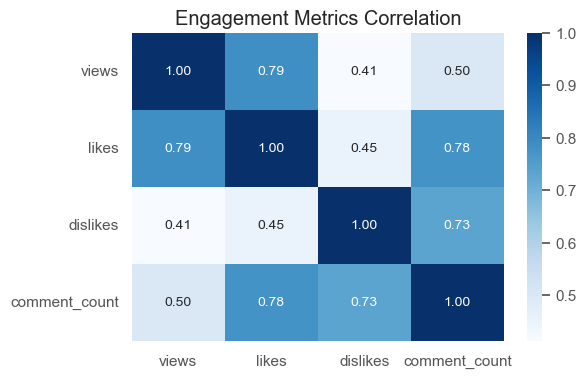

In [31]:
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Engagement Metrics Correlation")
plt.show()

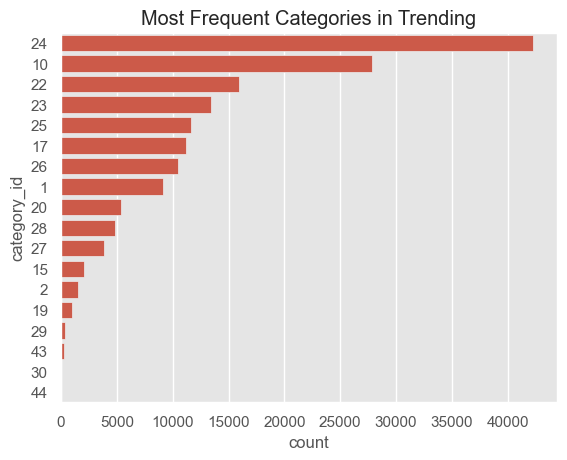

In [32]:
sns.countplot(y=df['category_id'], order=df['category_id'].value_counts().index)
plt.title("Most Frequent Categories in Trending")
plt.show()

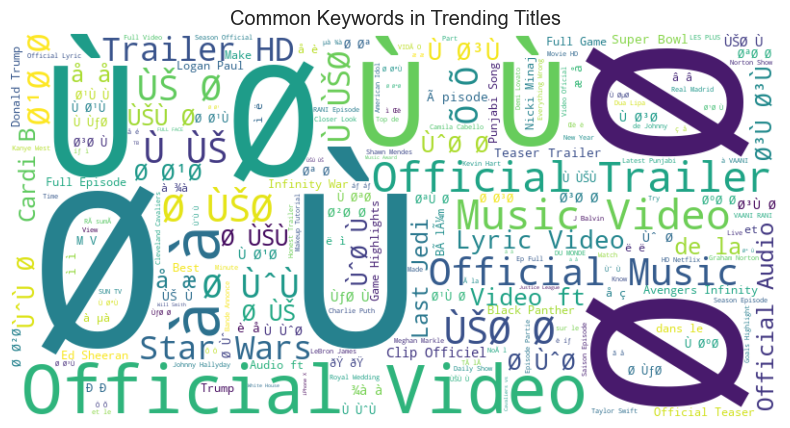

In [33]:
text = " ".join(df['title'].dropna().astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Keywords in Trending Titles")
plt.show()

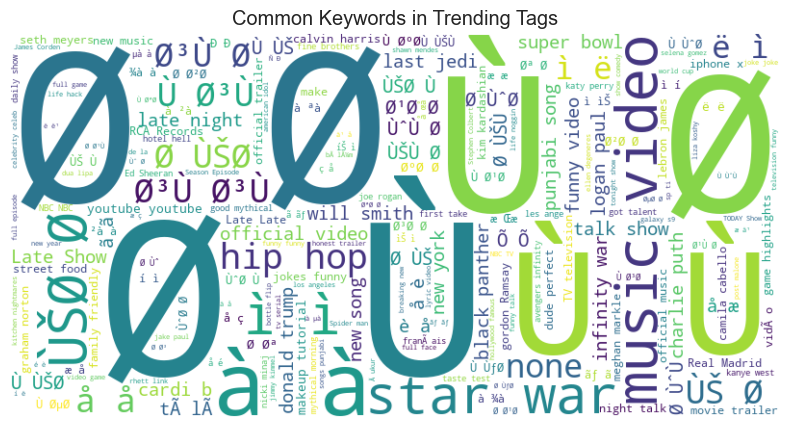

In [34]:
text_tags = " ".join(df['tags'].dropna().astype(str).values)

wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate(text_tags)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tags, interpolation="bilinear")
plt.axis("off")
plt.title("Common Keywords in Trending Tags")
plt.show()

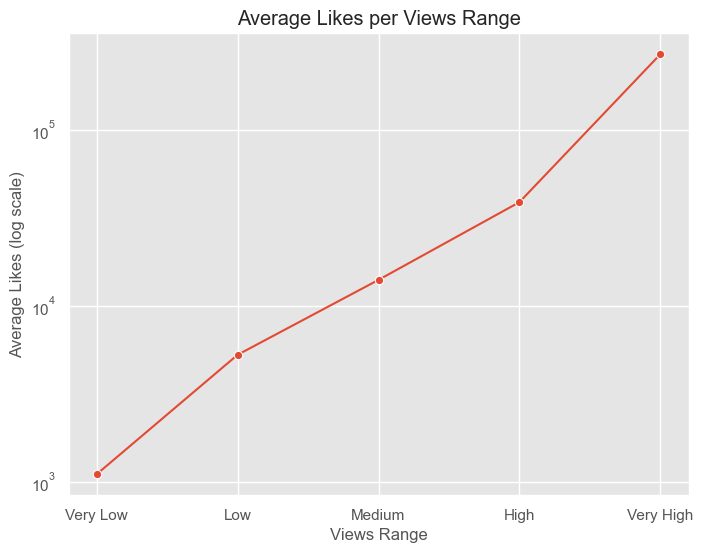

In [35]:
df['views_bin'] = pd.qcut(df['views'], q=5, labels=['Very Low','Low','Medium','High','Very High'])

avg_likes = df.groupby('views_bin')['likes'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(x='views_bin', y='likes', data=avg_likes, marker='o')
plt.yscale('log')
plt.title("Average Likes per Views Range")
plt.xlabel("Views Range")
plt.ylabel("Average Likes (log scale)")
plt.show()

In [36]:
corr_views_likes = df['views'].corr(df['likes'])
print(f"Correlation between views and likes: {corr_views_likes:.2f}")

Correlation between views and likes: 0.79


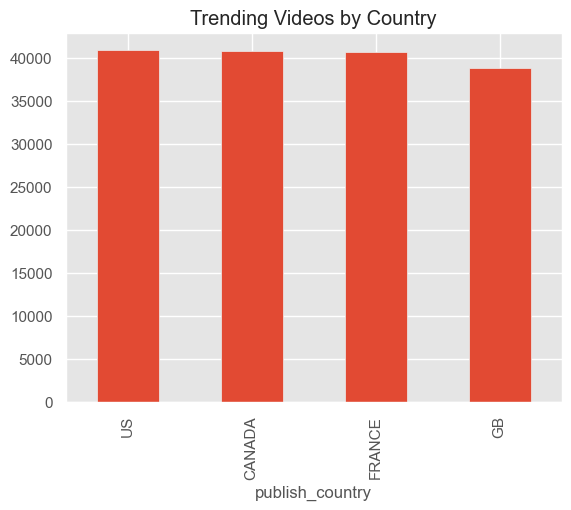

In [37]:
df['publish_country'].value_counts().plot(kind='bar')
plt.title("Trending Videos by Country")
plt.show()

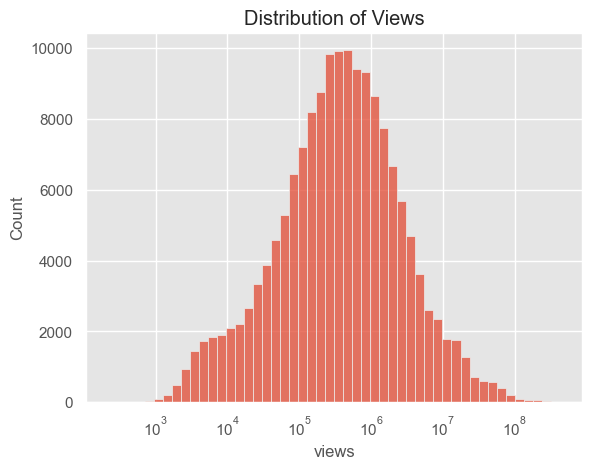

In [38]:
sns.histplot(df['views'], bins=50, log_scale=True)
plt.title("Distribution of Views")
plt.show()


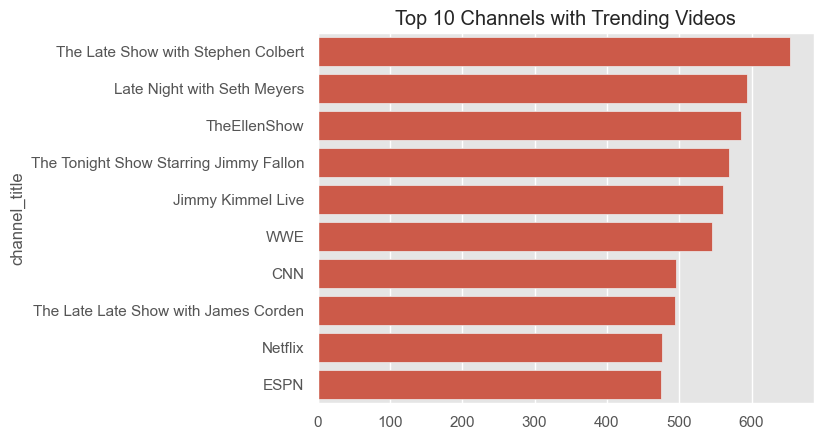

In [39]:
top_channels = df['channel_title'].value_counts().head(10)
sns.barplot(x=top_channels.values, y=top_channels.index)
plt.title("Top 10 Channels with Trending Videos")
plt.show()

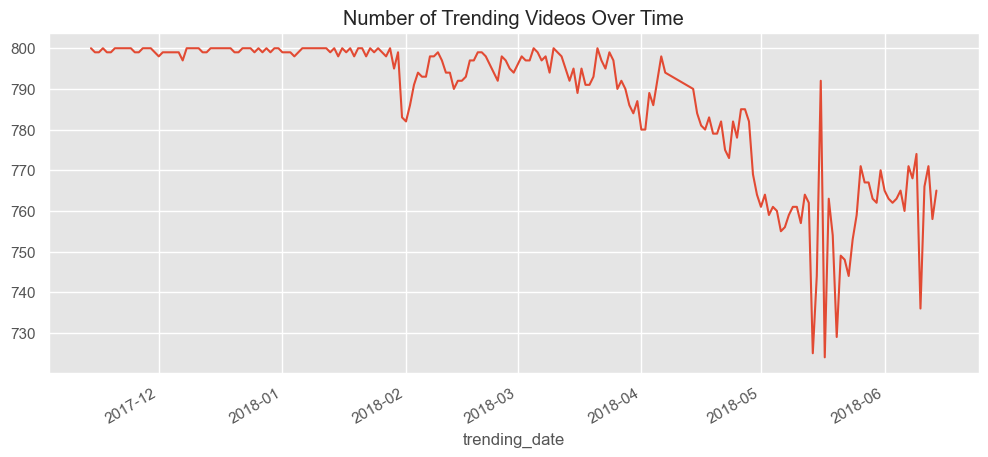

In [40]:
df['trending_date'].value_counts().sort_index().plot(figsize=(12,5))
plt.title("Number of Trending Videos Over Time")
plt.show()

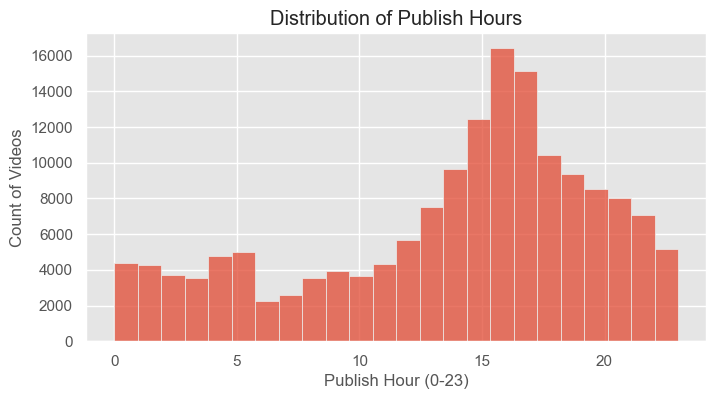

In [41]:
df['publish_hour'] = df['time_frame'].str.split(":").str[0].astype(int)

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='publish_hour', bins=24, kde=False)
plt.title("Distribution of Publish Hours")
plt.xlabel("Publish Hour (0-23)")
plt.ylabel("Count of Videos")
plt.show()

In [42]:
# the effect of publish hour on views

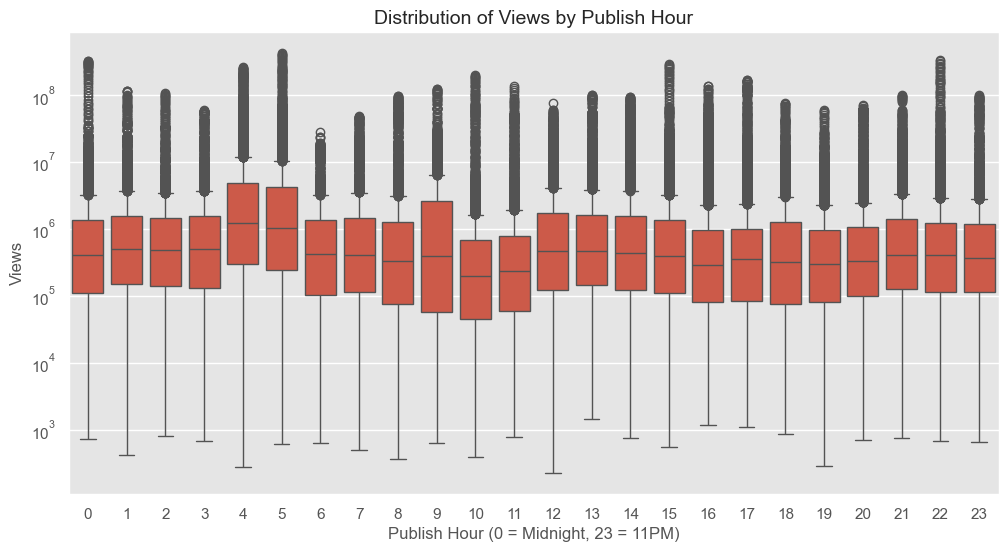

In [43]:
# Box plot --> for the distribution
plt.figure(figsize=(12,6))
sns.boxplot(x="publish_hour", y="views", data=df)
plt.title("Distribution of Views by Publish Hour", fontsize=14)
plt.xlabel("Publish Hour (0 = Midnight, 23 = 11PM)")
plt.ylabel("Views")
plt.yscale("log")
plt.show()

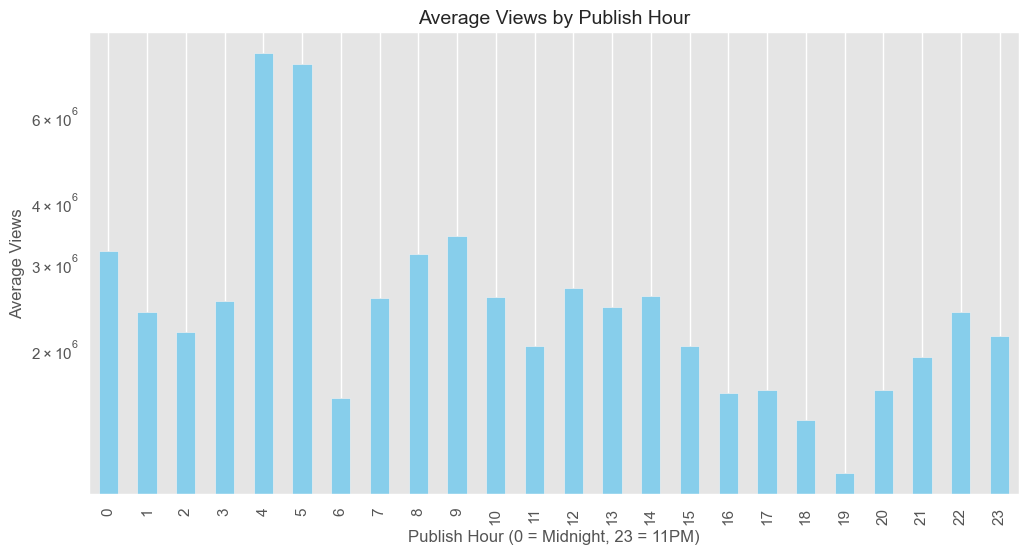

In [44]:
# 2 Bar_chart --> Average views
hourly_avg = df.groupby("publish_hour")["views"].mean()

plt.figure(figsize=(12,6))
hourly_avg.plot(kind="bar", color="skyblue")
plt.title("Average Views by Publish Hour", fontsize=14)
plt.xlabel("Publish Hour (0 = Midnight, 23 = 11PM)")
plt.ylabel("Average Views")
plt.yscale("log") 
plt.show()

## VIEWS PREDICTION

In [45]:
df.head()

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,views_bin,publish_hour
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False,High,17
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,Very High,7
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False,Very High,19
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False,Medium,11
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False,Very High,18


In [46]:
corr_with_views = df.corr(numeric_only=True)["views"].sort_values(ascending=False)
print(corr_with_views)

views                     1.000000
likes                     0.786696
comment_count             0.498773
dislikes                  0.413592
ratings_disabled          0.002336
comments_disabled        -0.002832
publish_hour             -0.078413
category_id              -0.161879
video_error_or_removed         NaN
Name: views, dtype: float64


In [47]:
df.shape

(161329, 18)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Feature Engineering
# Ratios for better predictors

df['like_ratio'] = df['likes'] / (df['views'] + 1)
df['comment_ratio'] = df['comment_count'] / (df['views'] + 1)

# Select features
features = ['likes', 'dislikes', 'comment_count',
            'category_id', 'publish_hour',
            'like_ratio', 'comment_ratio']

X = df[features]
y = df['views']

In [50]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=0)

In [51]:
model = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Random Forest Regressor')
print('R²:', r2_score(y_test, y_predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))

Random Forest Regressor
R²: 0.998367606941563
RMSE: 388860.2051799554
